In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import math as m
import os
import visualisation as vis
import simulation as sim

## Setting the directory name

In [2]:
name = 'Temp_1_Dens_08'
name_folder = "Simulation Data"
name_dir = "../" + name_folder + "/" + name

## Retrieving the main simulation input

In [3]:
# Getting input data from input.txt
input_values, t_array = vis.input_reader(name_dir)
D = input_values[0]
box_len = input_values[1]
dens = input_values[2]
number_unitcells = input_values[3]
N = input_values[4]
num_tsteps = input_values[5]
tstep = input_values[6]
T = input_values[7]
n_eq_tsteps = input_values[8]
bin_size = input_values[9]

print("Number of Equilibration t steps: ", n_eq_tsteps)
print("Number of Particles: ", N)

Number of Equilibration t steps:  12000
Number of Particles:  256


## Energy of the system

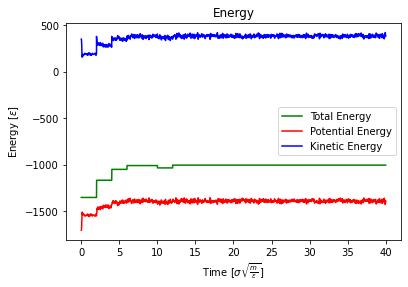

In [4]:
# Read data from .npy files
ekin = vis.data_reader(name_dir, 'kinetic_energy')
epot = vis.data_reader(name_dir, 'potential_energy')

# etot_array = np.zeros(num_tsteps, dtype=float)
etotal = ekin + epot

t = t_array
plt.plot(t, etotal, label="Total Energy", color='g')
plt.plot(t, epot, label="Potential Energy", color='r')
plt.plot(t, ekin, label="Kinetic Energy", color='b')
plt.xlabel(r'Time [$\sigma\sqrt{\frac{m}{\epsilon}}]$')
plt.ylabel(r'Energy [$\epsilon$]')
plt.title('Energy')
plt.legend()

plt.savefig(os.path.join(name_dir, 'Energy'))

## Calculating final average temperature with STD

In [5]:
T, T_std = sim.temp_determination(N, ekin, n_eq_tsteps)
print(T, T_std)

1.0097229776793457 0.00151665246073443


## Determining the state of the system
Using mean squared displacemen and the pair correlation function

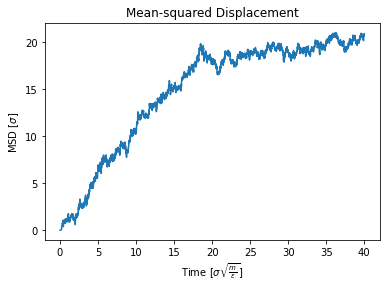

In [6]:
msd = vis.data_reader(name_dir, 'mean_squared_displacement')
plt.plot(t, msd)
plt.xlabel(r'Time [$\sigma\sqrt{\frac{m}{\epsilon}}]$')
plt.ylabel(r'MSD [$\sigma$]')
plt.title('Mean-squared Displacement')

plt.savefig(os.path.join(name_dir, 'MSD'))

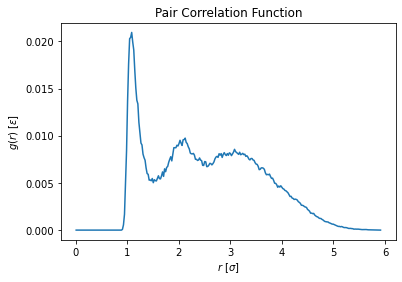

In [7]:
rel_dist_hist_t = vis.data_reader(name_dir, 'distance_histogram')
r, g_r = sim.pair_correlation_function(N, D, rel_dist_hist_t, n_eq_tsteps, bin_size, box_len)

plt.plot(r, g_r)
plt.xlabel(r'$r$ [$\sigma$]')
plt.ylabel(r'$g(r)$ [$\epsilon$]')
plt.title('Pair Correlation Function')
plt.savefig(os.path.join(name_dir, 'Pair_Correlation_Function'))

## Info about the Pressure and Specific Heat of the system

In [8]:
virial_t = vis.data_reader(name_dir, 'virial')
P, P_std = sim.pressure(N, T, T_std, virial_t, n_eq_tsteps)
print("The pressure of the system is equal to: ", P, "with an error of: ", P_std,"\n")

vis.specific_heat_info(name_dir, N, n_eq_tsteps)

The pressure of the system is equal to:  1.2463694640654823 with an error of:  0.009282295298755744 

The total specific heat of the system is equal to:  343.85332475008084 with an error of:  82.67719381077458
The specific heat per particle is equal to:  1.3431770498050033 with an error of:  0.3229577883233382
